## 💼 Project: Employee Salary Prediction App using Streamlit Library 


### 📝 1. Project Description
This project aims to develop a machine learning model that predicts employee salaries based on key features such as age gender, education level, job title, and years of experience. The model will be deployed using a Streamlit web app to make real-time predictions through a user-friendly interface.

### 📊 2. Dataset Overview
We are using the provided dataset Salary Data.csv, which includes the following columns:
| Feature             | Description                              |
| ------------------- | ---------------------------------------- |
| Age                 | Age of the employee                      |
| Gender              | Gender of the employee                   |
| Education Level     | Highest qualification (e.g., Bachelor's) |
| Job Title           | Employee’s role in the organization      |
| Years of Experience | Total experience in years                |
| Salary              | 💰 Target variable to predict            |


### 📌 Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score


### 📌 Step 2: Load the Dataset


In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\IBM skills build internship\dataset\Salary Data.csv")
df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### 📌 Step 3: Basic Info



In [3]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
df.describe()


,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [5]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

### 📌 Step 4: Data Cleaning


In [6]:
# Drop rows with missing Salary
df = df.dropna(subset=['Salary'])

# Recommended method to fill missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].mean())


### 📌 Step 5: Exploratory Data Analysis (Graphs)



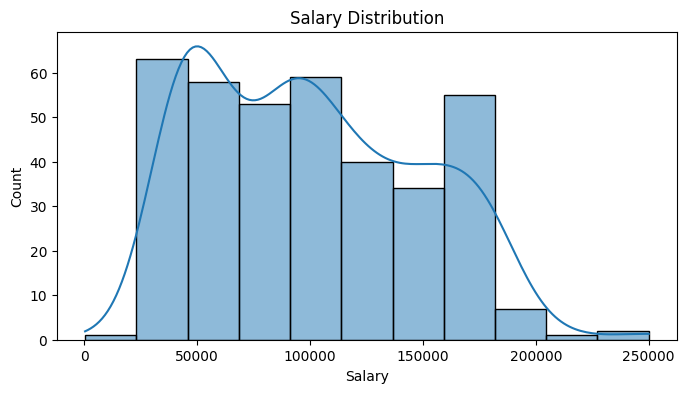

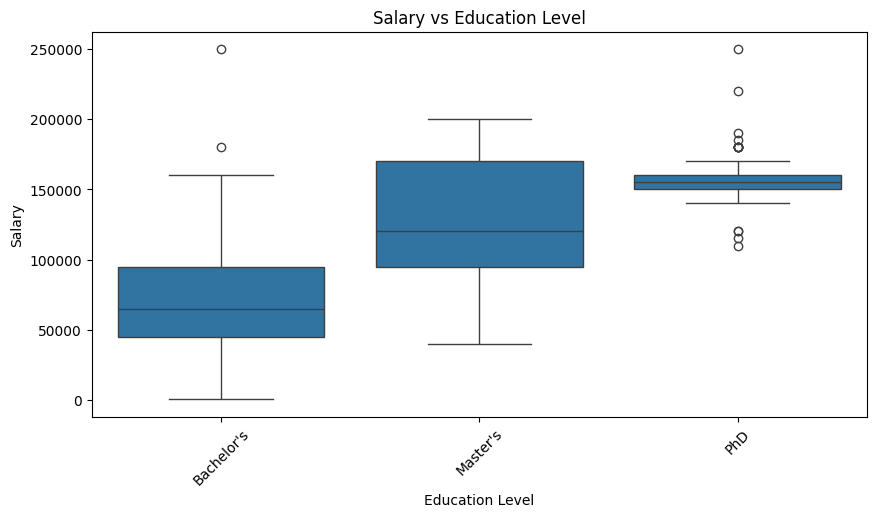

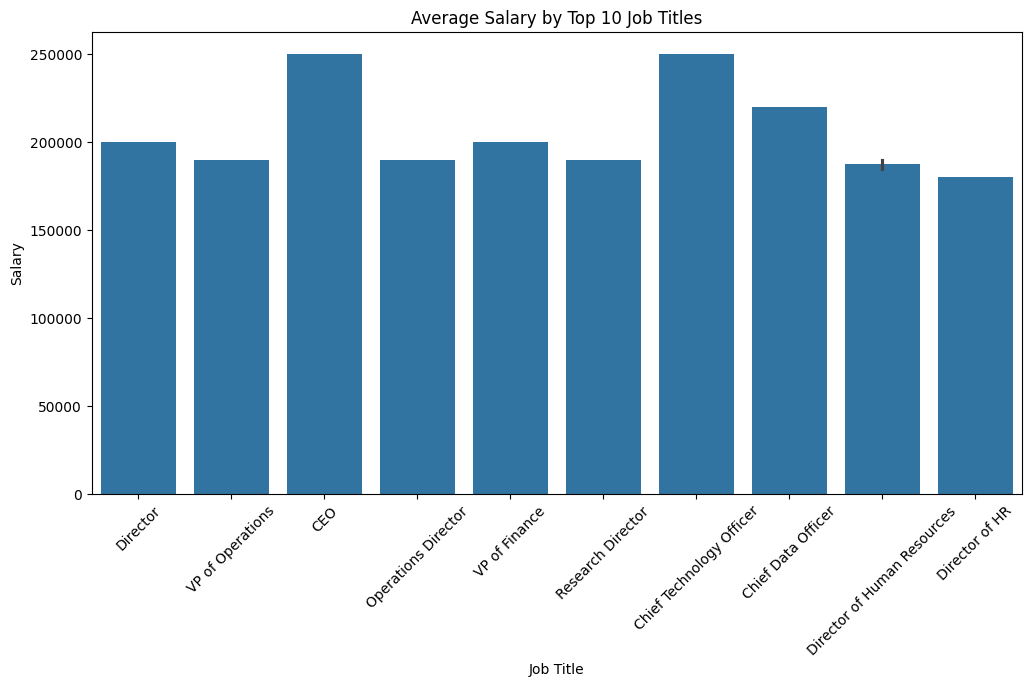

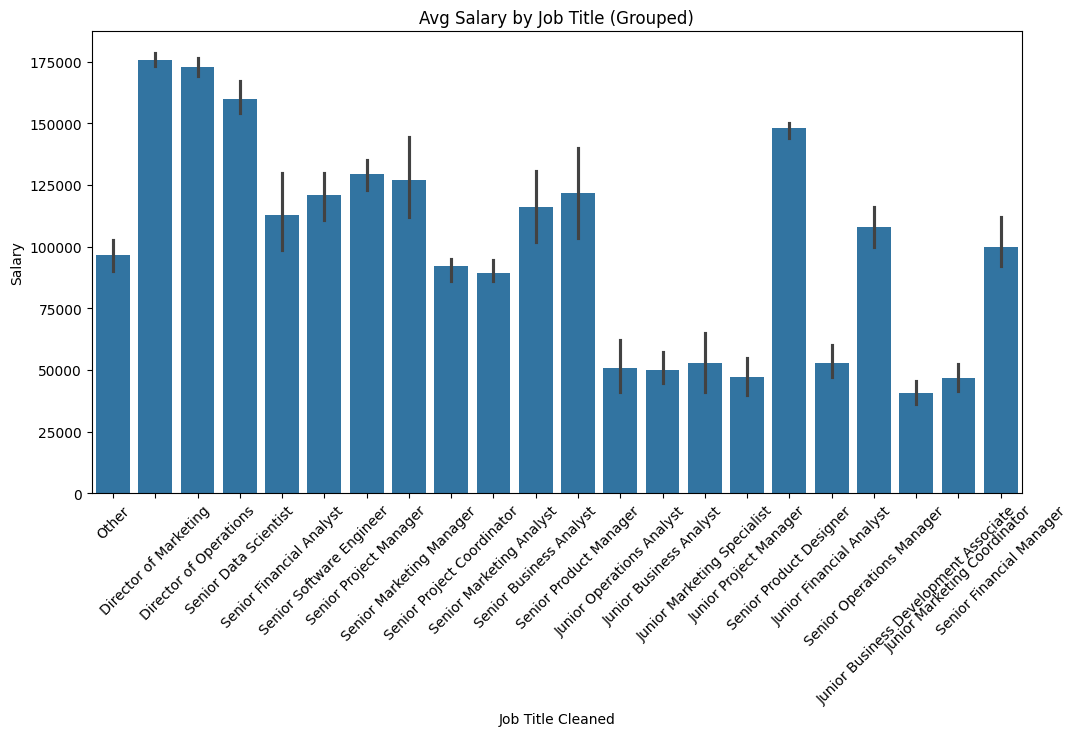

In [7]:
# Salary Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.show()

# Boxplot by Education Level
plt.figure(figsize=(10,5))
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.title('Salary vs Education Level')
plt.xticks(rotation=45)
plt.show()

# Barplot by Job Title
# Get top 10 job titles by average salary
top_jobs = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False).head(10)

# Filter only top job titles
filtered_df = df[df['Job Title'].isin(top_jobs.index)]

plt.figure(figsize=(12,6))
sns.barplot(x='Job Title', y='Salary', data=filtered_df)
plt.xticks(rotation=45)
plt.title('Average Salary by Top 10 Job Titles')
plt.show()

# If a job title appears less than 5 times, group it as "Other"
job_counts = df['Job Title'].value_counts()
rare_titles = job_counts[job_counts < 5].index
df['Job Title Cleaned'] = df['Job Title'].apply(lambda x: 'Other' if x in rare_titles else x)

# Now plot cleaned titles
plt.figure(figsize=(12,6))
sns.barplot(x='Job Title Cleaned', y='Salary', data=df)
plt.xticks(rotation=45)
plt.title('Avg Salary by Job Title (Grouped)')
plt.show()


### 📌 Step 6: Train/Test Split



In [8]:
X = df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 📌 Step 7: Preprocessing + Model Pipeline


In [9]:
categorical_cols = ['Gender', 'Education Level', 'Job Title']
numerical_cols = ['Age', 'Years of Experience']

preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Age',
                                                   'Years of Experience']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Education Level',
                                                   'Job Title'])])),
                ('regressor', LinearRegression())])

### 📌 Step 8: Evaluation


In [10]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.8522465661020857
MSE: 354251006.3859255


### 📌 Step 9: Save Model


In [11]:
joblib.dump(model, 'salary_model.pkl')


['salary_model.pkl']

### 🌐 Step 10: Create the Streamlit App (app.py)


In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import joblib

# Load your cleaned dataset
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\IBM skills build internship\dataset\Salary Data.csv")

# Drop rows with missing values in the required columns
df = df.dropna(subset=['Age', 'Years of Experience', 'Salary'])

# Select features and target
X = df[['Age', 'Years of Experience']]
y = df['Salary']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Save the trained model
joblib.dump(model, "salary_model.pkl")

print("✅ Model trained and saved as 'salary_model.pkl'")


✅ Model trained and saved as 'salary_model.pkl'


In [13]:
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("salary_model.pkl")

# Streamlit page settings
st.set_page_config(page_title="Salary Prediction", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Prediction App")
st.markdown("Enter the employee details below to predict their salary.")

# Input fields
age = st.number_input("Age", min_value=18, max_value=65, value=30)
experience = st.slider("Years of Experience", 0, 40, 5)

# Predict salary
if st.button("Predict Salary"):
    # Prepare input data
    input_df = pd.DataFrame([[age, experience]], columns=["Age", "Years of Experience"])
    
    # Prediction
    predicted_salary = model.predict(input_df)[0]
    st.success(f"💰 Predicted Salary: ₹{predicted_salary:,.2f}")


2025-07-19 23:24:03.985 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-19 23:24:04.014 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-19 23:24:08.936 
  command:

    streamlit run C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-19 23:24:08.936 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-19 23:24:08.947 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-19 23:24:08.947 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-19 23:24:08.947 Thread 'MainThread': missing ScriptRunContext! This warning can 

In [ ]:
!streamlit run app.py
